## Lab-proyecto 4

* Lohana Sánchez Benavides - 2017239552
* Moisés Salguero Morales - 2017238398


En este Lab-proyecto se analizarán diferentes tipos de modulación de Amplitud (AM). Como la modulación de doble banda lateral con portadora suprimida DSB-SC y DSB-LC. Para esto se haran pruebas frecuencias y amplitudes predefinidas y observará gráficas en tiempo y frecuencia para los diversos análisis. 

Primeramente se importaron todas las librerías que se utilizarán a lo largo de la notebook 

In [5]:
# importación de librerías 

import matplotlib.pyplot as plt
import math
import numpy as np
import scipy as sp
from scipy import signal 
from scipy import linalg
import scipy.constants as spc
from scipy import integrate
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import butter, lfilter, freqz

### Función para modulación de ángulo

Para la actividad 1 se debe obtener las curvas que describen el comportamiento básico de un sistema de modulación de ángulo, utilizando las ecuaciones de señal modulada FM y PM, como se muestra a continuación:

* _m(t)= A<sub>m</sub>cos(2πf<sub>m</sub>t)_

* _S<sub>PM</sub>(t) = A<sub>c</sub>cos(2πf<sub>c</sub>t + k<sub>p</sub>m(t))_

* _S<sub>fM</sub>(t) = A<sub>c</sub>cos(2πf<sub>c</sub>t + 2πk<sub>f</sub> ∫m(τ)dτ)_

Se desplegan las gráficas de la señal moduladora, la derivada de la señal moduladora, la señal portadora, la señal modulada por fase y la señal modulada en la frecuencia.

In [12]:
def modulation_angulo(fm, fc, am, ac, kp, kf, t):
  # definición de funciones matemáticas                      # señal de frecuencia 
  mt = am*np.cos(2*np.pi*fm*t)              # señal moduladora en el tiempo
  mdt = -am*2*np.pi*fm*np.sin(2*np.pi*fm*t) # derivada de mt   
  mti = am*np.sin(2*np.pi*fm*t)/(2*np.pi*fm)         # integral de mt
  portadora = ac*np.cos(2*np.pi*fc*t) # señal portadora  en el tiempo
  modulada_pm =  ac*np.cos(2*np.pi*fc*t + kp*mt)            # señal modulada en el tiempo
  modulada_fm = ac*np.cos(2*np.pi*fc*t + 2*np.pi*kf*mti)


  %matplotlib inline
    #(\u03C9)
  # señal moduladora en el tiempo
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(t, mt, label = "m(t)", color ="blue")
  ax1.plot(t, mdt/(2*np.pi*fm), label = "m'(t)", color= "orange")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_xlim(0, 0.02)
  ax1.legend(loc="upper right")
  ax1.set_title('Message signal and it´s derivate') 
  

  # Señal portadora en tiempo 
  ax2.plot(t, portadora,  color = "black")
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("time (s)")
  ax2.set_title('Carrier signal') 
  ax2.set_xlim(0, 0.02)
  plt.tight_layout()
  plt.legend(loc="upper left")
  plt.show()

  # señal modulada en el tiempo 
  fig, (ax3, ax4) = plt.subplots(2)
  ax3.plot(t, modulada_pm , color = "orange")
  #ax3.plot(t, modulada_fm , label = "FM modulated signal")
  ax3.set_ylabel("Amplitude")
  ax3.set_xlabel("time (s)")
  ax3.set_title('PM signal') 
  ax3.set_xlim(0, 0.02)


  # señal modulada en el tiempo 
  ax4.plot(t, modulada_fm ,  color = "blue")
  ax4.set_ylabel("Amplitude")
  ax4.set_xlabel("time (s)")
  ax4.set_title('FM signal')
  ax4.set_xlim(0, 0.02)
  plt.tight_layout()
  plt.show()



En esta sección se llama la función encargada de modular la señal y generar las curvas, las cuales son: la señal portadora y su derivada en la primer gráfica, la señal moduladora en la segunda gráfica y luego las señales PM y FM en la tercera y cuarta gráfica respectivamente. 

Se utilizó en este caso variables con valores _f<sub>m_=250, _f<sub>c_=1000 para que exista una diferencia notable en su frecuencia ya que la portadora debe tener la frecuencia más alta que la moduladora, luego se escogió  _A<sub>c_=1, _A<sub>m_=1 para obtener una sencilla visualización, y finalmente el valor de _k<sub>p_=2 y _k<sub>f_=500 para que β tenga un valor de 2 y se observe los efectos en la señal.

Además de esto se definió el espectro del tiempo y algunas otras variables necesarias. 

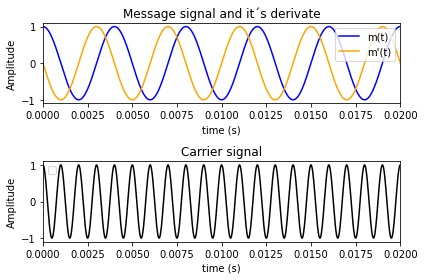

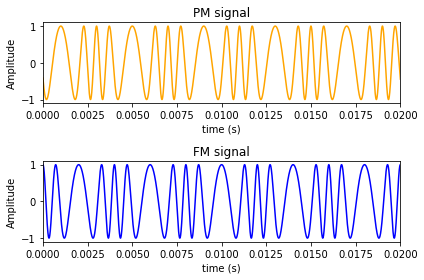

In [13]:
# valor de frecuencias y amplitud
fm = 250
fc = 1000
Am = 1
Ac = 1
kp = 2
kf = 500


# espacio entre muestras̹
s = 1/(fc*200)
# puntos de muestra
t = np.arange(0, 100/fc, s)     # puntos en t
tf = np.arange(0, 200/fc, s)   # puntos en t para transformar a frecuencia 
# numero muestras para frecuencia 
N = len(tf)
frec = fftfreq(N, s) 

# Llamada a la función moduladora para obtener gráficas 
modulation_angulo(fm, fc, Am, Ac, kp, kf, t)

En las curvas anteriores se muestra la señal moduladora en azul y su derivada en naranja en la primera gráfica. Luego de esto, se observa la señal portadora en negro en la segunda gráfica. 

La señal PM se visualiza en la tercera gráfica, y además, se puede notar que la señal PM aumenta su frecuencia cuando la señal _m'(t)_ tiene sus máximos y tiene su frecuencia mínima cuando _m'(t)_ tiene sus mínimos. 

De igual manera, la señal FM aumenta su frecuencia cuando la señal _m(t)_ tiene sus máximos y su frecuencia disminuye al mínimo cuando _m(t)_ tiene sus mínimos. 

### Función para modulación de NBFM y NBPM

En esta sección se presenta un modulador NBFM y un modulador NBPM, los cuales se definen mediante las siguientes ecuaciones: 

* _S<sub>NBFM</sub>(t) = A<sub>c</sub>cos(2πf<sub>c</sub>t) - βA<sub>c</sub>sin(2πf<sub>c</sub>t)sin(2πf<sub>m</sub>t)_

* _S<sub>NBFM</sub>(t) = A<sub>c</sub>cos(2πf<sub>c</sub>t) - βA<sub>c</sub>sin(2πf<sub>c</sub>t)cos(2πf<sub>m</sub>t)_

En esta sección se presentarán las curvas de las señales tanto en el tiempo como en la frecuencia y se analizarán las mismas. Para esto, se utilizarán dos diferentes valores de β, uno donde la señal NBFM tenga amplitud residual y otro donde no exista tal efecto. 

In [44]:
def modulacionNB(fc, fm, ac, beta,  t, frec, N): 
  

  nbfm = ac*np.cos(2*np.pi*fc*t) - beta*ac*np.sin(2*np.pi*fc*t)*np.sin(2*np.pi*fm*t)
  nbpm = ac*np.cos(2*np.pi*fc*t) - beta*ac*np.sin(2*np.pi*fc*t)*np.cos(2*np.pi*fm*t)

  # señal de salida sin filtrar en el tiempo 
  fig, (ax1, ax2)  = plt.subplots(2)
  ax1.plot(t, nbfm)
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_xlim([0,0.05])
  ax1.set_title('NBFM en el tiempo') 

  # señal de salida sin filtrar en la frecuencia 
  sf = fft(nbfm)                   # portadora en frecuencia
  ax2.plot(frec, 1/N * np.abs(sf))
  ax2.set_xlim([-1000, 1000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  ax2.set_title('NBFM en frecuencia') 
  plt.tight_layout()
  plt.show()

  # señal de salida sin filtrar en el tiempo 
  fig, (ax1, ax2)  = plt.subplots(2)
  ax1.plot(t, nbpm)
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('NBPM en el tiempo') 
  ax1.set_xlim([0,0.05])

  # señal de salida sin filtrar en la frecuencia 
  sf = fft(nbpm)                   # portadora en frecuencia
  ax2.plot(frec, 1/N *np.abs(sf))
  ax2.set_xlim([-1000, 1000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  ax2.set_title('NBPM en frecuencia') 
  plt.tight_layout()
  plt.show()
  

Definición de valores para las señales

In [41]:
N = len(tf)
fm = 100
fc = 400
Am = 1
Ac = 1

s = 1/(fc*500)
frec = fftfreq(N, s) 

LLamada de la función para un β que no genere amplitud residual. En este caso se tomó un valor de 0.25 debido a que para valores mayores a 0.3 se tiene una amplitud residual.

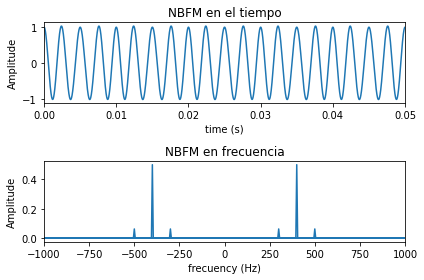

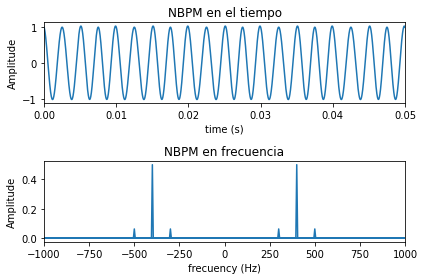

In [45]:
beta = 0.25
modulacionNB(fc, fm, Ac, beta,  tf, frec, N)

Como se observa en las graficas anteriores con el valor pequeño de β que se utilizó, no existe amplitud residual en la señal modulada. 
Además en la frecuencia se observa que existen 3 componentes, esto debido a que las funciones de NBFM y NBPM se puede expresar como: 

* _S<sub>NBFM</sub>(t) = A<sub>c</sub>cos(2πf<sub>c</sub>t) - 1/2 βA<sub>c</sub>[cos(2π(f<sub>c</sub>+f<sub>m</sub>)t) - cos(2π(f<sub>c</sub>-f<sub>m</sub>)t)]_
* _S<sub>NBFM</sub>(t) = A<sub>c</sub>cos(2πf<sub>c</sub>t) - 1/2 βA<sub>c</sub>[sin(2π(f<sub>c</sub>+f<sub>m</sub>)t) - sin(2π(f<sub>c</sub>-f<sub>m</sub>)t)]_

Donde se observa que existen 3 senos diferentes y por lo tanto en el dominio de la frecuencia se observarán 3 frecuencias diferentes, ubicadas en _fc, fc+fm y fc-fm_ y sus negativos. 



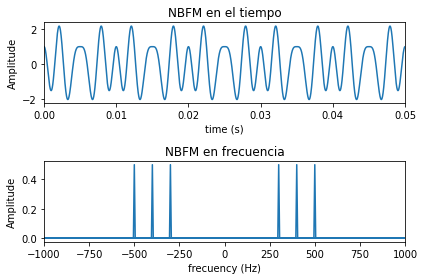

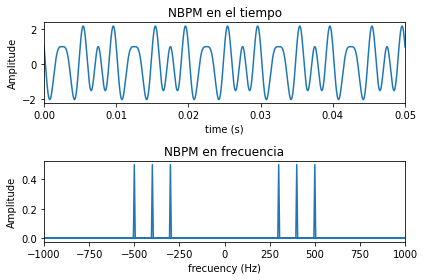

In [46]:
beta = 2
modulacionNB(fc, fm, Ac, beta,  tf, frec, N)

En este caso se observa que en ambas señales existe una amplitud residual, esto se debe a que el valor de β fue de 2, y se sabe que este valor debería ser menor a 0.3 para que no exista el efecto.

## Modulacion WBFM

En esta sección se presenta una rutina que realiza la modulación de frecuencia en banda ancha WBFM con un tono clásico _A<sub>m</sub>cos(2πf<sub>m</sub>t)_ y luego se analizará la señal variando un parámetro de β a la vez, primero se varía el _Δf_ y luego _f<sub>m</sub>_ y finalmente se usa un valor pequeño de β. El valor de β está definido por: 

> _β = Δf/fm_

Y la ecuación de modulación de frecuencia
> _S<sub>fM</sub>(t) = A<sub>c</sub>cos(2πf<sub>c</sub>t + βsin(2πf<sub>m</sub>t))_



In [112]:
def modulacionWBFM(fc, fm, ac, deltaF, t, frec, N, limite): 

  beta = deltaF/fm
  print("Beta: " + str(beta))
  nbfm = ac*np.cos(2*np.pi*fc*t + beta*np.sin(2*np.pi*fm*t))
  

  # señal de salida sin filtrar en el tiempo 
  fig, (ax1, ax2)  = plt.subplots(2)
  ax1.plot(tf, nbfm)
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_xlim([0,0.05])
  ax1.set_title('NBFM en el tiempo') 

  # señal de salida sin filtrar en la frecuencia 
  sf = fft(nbfm)                   # portadora en frecuencia
  ax2.plot(frec, 1/N * np.abs(sf))
  ax2.set_xlim(limite)
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  ax2.set_title('NBFM en frecuencia') 
  plt.tight_layout()
  plt.show()
  

#### Manteniendo constante el valor de f<sub>m</sub> y variando el Δf. 

Primero se asigna un valor de Δf = 250

Beta: 1.25


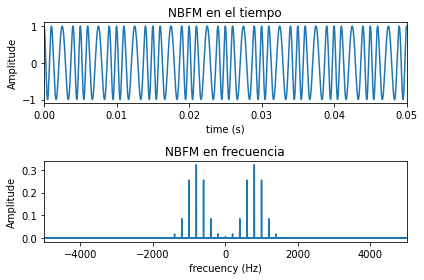

In [113]:
# valor de frecuencias y amplitud
fm = 200
fc = 800
Am = 1
Ac = 1
delta= 250
limite = [-5000, 5000]

modulacionWBFM(fc, fm, Ac, delta, tf, frec, N, limite)

Luego, se cambia el valor a Δf = 500

Beta: 2.5


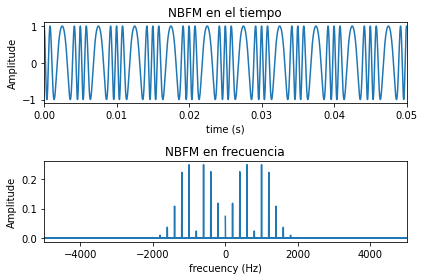

In [114]:
# valor de frecuencias y amplitud
fm = 200
fc = 800
Am = 1
Ac = 1
delta= 500

modulacionWBFM(fc, fm, Ac, delta, tf, frec, N, limite)

Con un valor de Δf = 1000

Beta: 5.0


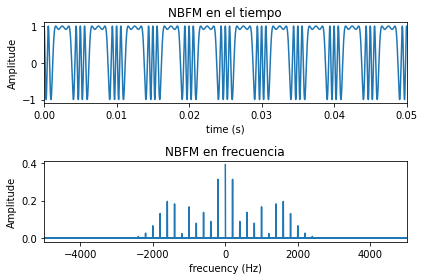

In [115]:
# valor de frecuencias y amplitud
fm = 200
fc = 800
Am = 1
Ac = 1
delta= 1000

modulacionWBFM(fc, fm, Ac, delta, tf, frec, N, limite)

Y finalmente con un valor de Δf = 2000

Beta: 10.0


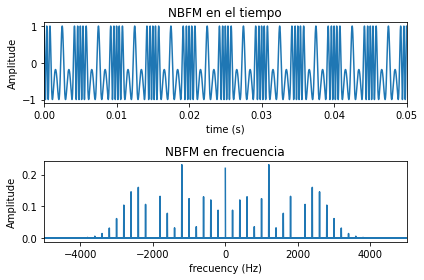

In [118]:
# valor de frecuencias y amplitud
fm = 200
fc = 800
Am = 1
Ac = 1
delta= 2000

modulacionWBFM(fc, fm, Ac, delta, tf, frec, N, limite)

Se puede observar que mientras mas alto es el valor de Δf para un fm constante,  el ancho de banda aumenta.

Para las gráficas en el tiempo se aprecia, que existe un efecto de amplitud residual conforme el Δf aumenta.

#### Ahora se cambia el valor de f<sub>m</sub> y se mantien el valor de Δf constante. 

Primero se usó un valor de f<sub>m</sub> = 200

Beta: 5.0


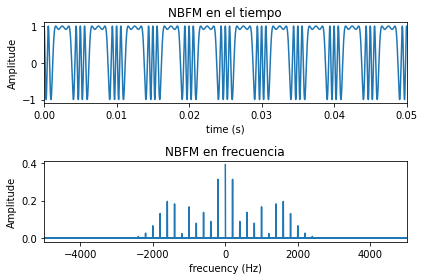

In [129]:
fm = 200
fc = 800
Am = 1
Ac = 1
delta= 1000
limite = [-5000, 5000]
modulacionWBFM(fc, fm, Ac, delta, tf, frec, N, limite)

Luego, se usó un valor de f<sub>m</sub> = 100



Beta: 10.0


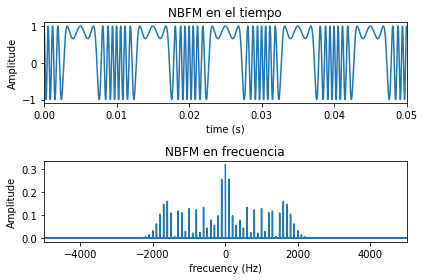

In [130]:
fm = 100
fc = 800
Am = 1
Ac = 1
delta= 1000

modulacionWBFM(fc, fm, Ac, delta, tf, frec, N, limite)

Después, se usó un valor de f<sub>m</sub> = 50



Beta: 20.0


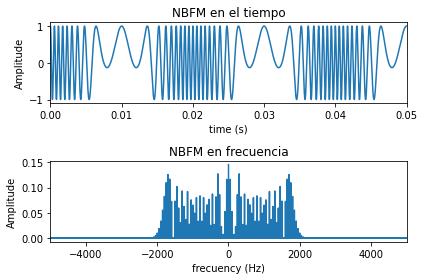

In [131]:
fm = 50
fc = 800
Am = 1
Ac = 1
delta= 1000

modulacionWBFM(fc, fm, Ac, delta, tf, frec, N, limite)

Con un valor de f<sub>m</sub> = 10



Beta: 100.0


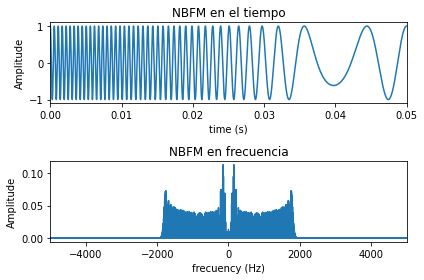

In [132]:
fm = 10
fc = 800
Am = 1
Ac = 1
delta= 1000

modulacionWBFM(fc, fm, Ac, delta, tf, frec, N, limite)

Se puede observar que la banda nacha cada vez, contienen una mayor cantidad de frecuencias.i

Seguidamente, se probará para un  valor de beta pequeño, para observar su comportamiento en NFFM

Beta: 0.1


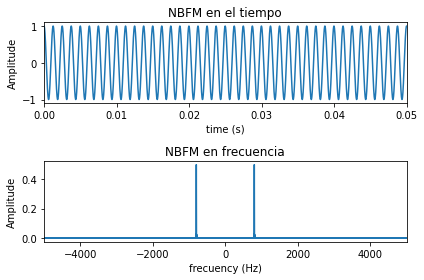

In [136]:
fm = 10
fc = 800
Am = 1
Ac = 1
delta= 1

modulacionWBFM(fc, fm, Ac, delta, tf, frec, N, limite)

Debido a que se hace uso de la siguiente fomula
> _S<sub>fM</sub>(t) = A<sub>c</sub>cos(2πf<sub>c</sub>t + βsin(2πf<sub>m</sub>t))_

y para un beta pequeño, el desfase se vuelve mas pequeño, esto anula la señal de seno y predomina la señal del coseno. Por esto, en la frecuencia se observa dos frecuencias pertenecientes del coseno.